### Random Number Generator for shuffling the cards

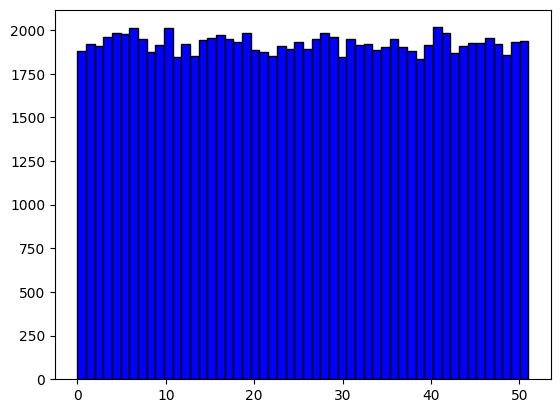

In [195]:
# we will be using this for the random number generator

# linear random number generator
import matplotlib.pyplot as plt
def lcg(seed):
    a = 16645253
    c = 1013904223
    m = 2**32
    seed = (a * seed + c) % m
    return seed
# display the random numbers mod 52 using matplotlib
random_numbers = []
def display_random_numbers(seed):
    for i in range(100000):
        seed = lcg(seed)
        random_numbers.append(seed % 52)
    # show bargraph of random numbers
    plt.hist(random_numbers, bins=52, color='blue', edgecolor='black')
    plt.show()

seed = 1244
display_random_numbers(seed)

### we have equal probability of getting any number between 0 and 51 (i.e. any card in the deck) so fair shuffle

### Programing The Deck

In [196]:
class Deck:
    def __init__(self):
        self.num_decks = 1
        self.deck = [i%52 for i in range(52 * self.num_decks)]
        self.current_seed = 123
    
    def __init__(self,num_decks,seed = 123):
        self.num_decks = num_decks
        self.deck = [i%52 for i in range(52 * self.num_decks)]
        self.current_seed = seed

    def display_deck(self):
        print(self.deck)

    def shuffle(self):
        new_deck = []
        seed = lcg(self.current_seed)
        while(len(new_deck) < 52 * self.num_decks):
            seed = lcg(seed)
            card = seed % 52
            # to reject if we have already added the card the maximum number of times
            if new_deck.count(card) < self.num_decks:
                new_deck.append(card)
        self.current_seed = seed
        self.deck = new_deck
    
    def cut(self,position):
        if position < 0 or position > 52 * self.num_decks:
            print("Invalid cut position")
            return
        self.deck = self.deck[position:] + self.deck[:position]

    def deal(self):
        if len(self.deck) == 0:
            print("No more deck to deal")
            return
        return self.deck.pop()


# script to check if shuffle not producing extra cards
# n = 6
# Deck1 = Deck(n,123)
# # make a hashmap of the deck for occurance
# Deck1.shuffle()
# Deck1.display_deck()
# deck_map = {}
# for i in range(52):
#     deck_map[i] = 0
# for i in range(52 * n):
#     card = Deck1.deal()
#     deck_map[card] += 1
# print(deck_map)

### Stuff for calculating the points in a hand

In [197]:
# utility hash maps for card values
card_map = {
    0 : 'Ah',
    1 : '2h',
    2 : '3h',
    3 : '4h',
    4 : '5h',
    5 : '6h',
    6 : '7h',
    7 : '8h',
    8 : '9h',
    9 : '10h',
    10 : 'Jh',
    11 : 'Qh',
    12 : 'Kh',
    13 : 'Ad',
    14 : '2d',
    15 : '3d',
    16 : '4d',
    17 : '5d',
    18 : '6d',
    19 : '7d',
    20 : '8d',
    21 : '9d',
    22 : '10d',
    23 : 'Jd',
    24 : 'Qd',
    25 : 'Kd',
    26 : 'As',
    27 : '2s',
    28 : '3s',
    29 : '4s',
    30 : '5s',
    31 : '6s',
    32 : '7s',
    33 : '8s',
    34 : '9s',
    35 : '10s',
    36 : 'Js',
    37 : 'Qs',
    38 : 'Ks',
    39 : 'Ac',
    40 : '2c',
    41 : '3c',
    42 : '4c',
    43 : '5c',
    44 : '6c',
    45 : '7c',
    46 : '8c',
    47 : '9c',
    48 : '10c',
    49 : 'Jc',
    50 : 'Qc',
    51 : 'Kc'
}

num_to_card = {
    'Ah' : 0,
    '2h' : 1,
    '3h' : 2,
    '4h' : 3,
    '5h' : 4,
    '6h' : 5,
    '7h' : 6,
    '8h' : 7,
    '9h' : 8,
    '10h' : 9,
    'Jh' : 10,
    'Qh' : 11,
    'Kh' : 12,
    'Ad' : 13,
    '2d' : 14,
    '3d' : 15,
    '4d' : 16,
    '5d' : 17,
    '6d' : 18,
    '7d' : 19,
    '8d' : 20,
    '9d' : 21,
    '10d' : 22,
    'Jd' : 23,
    'Qd' : 24,
    'Kd' : 25,
    'As' : 26,
    '2s' : 27,
    '3s' : 28,
    '4s' : 29,
    '5s' : 30,
    '6s' : 31,
    '7s' : 32,
    '8s' : 33,
    '9s' : 34,
    '10s' : 35,
    'Js' : 36,
    'Qs' : 37,
    'Ks' : 38,
    'Ac' : 39,
    '2c' : 40,
    '3c' : 41,
    '4c' : 42,
    '5c' : 43,
    '6c' : 44,
    '7c' : 45,
    '8c' : 46,
    '9c' : 47,
    '10c' : 48,
    'Jc' : 49,
    'Qc' : 50,
    'Kc' : 51
}

def value(card):
    # aces are 11
    if card % 13 == 0:
        return 11
    elif card % 13 >= 9:
        return 10
    else:
        return card % 13 + 1
    
def calculate_points(hand):
    # if no aces in hand then return the sum (aces begin with letter A and end with s,d,c,h)
    if 'As' not in hand and 'Ad' not in hand and 'Ac' not in hand and 'Ah' not in hand:
        return sum([value(num_to_card[card]) for card in hand])
    # if we have s in hand then we need to check if we can reduce the value of the ace to 1 if score is greater than 21
    points = sum([value(num_to_card[card]) for card in hand])
    num_aces = hand.count('As') + hand.count('Ad') + hand.count('Ac') + hand.count('Ah')
    if points > 21:
        for i in range(num_aces):
            points -= 10
            if points <= 21:
                return points
    return points



### File I/O

In [198]:
with open('game_history.txt','w') as f:
    f.write("Game history\n")
    
def fprint(str):
    with open('game_history.txt','a') as f:
        f.write(str)
def print_cards(player_hand,dealer_hand,balance):
    fprint("Player hand: " + str(player_hand) + "\n")
    fprint("Dealer hand: " + str(dealer_hand) + "\n")
    fprint("balance: " + str(balance) + "\n") 
    fprint("**************" + "\n")

### Simluating One Round of Black Jack

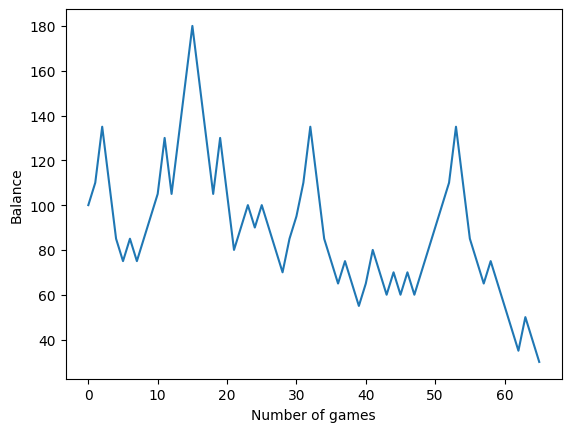

In [199]:
# the game
deck = Deck(6,124)
deck.shuffle()
balance = 100
balance_history = [balance]

balance_history = [balance]
for i in range(100):
    if balance <= 100:
        bet = 10
    elif balance <= 200:
        bet = 25
    elif balance <= 400:
        bet = 50
    elif balance <= 800:
        bet = 100
    elif balance <= 1600:
        bet = 200
    else:
        bet = 500

    # check if deck is sufficient we reshuffle when we have 1/3 of the deck left
    if len(deck.deck) < 52 * deck.num_decks / 3:
        fprint("reshuffling deck\n")
        # print("reshuffling deck")
        deck.shuffle()

    player_hand = []
    player_points = 0
    dealer_hand = []
    dealer_points = 0
    card = -1
    # initial game
    card = deck.deal()
    player_hand.append(card_map[card])
    player_points = calculate_points(player_hand)

    card = deck.deal()
    dealer_hand.append(card_map[card])
    dealer_points = calculate_points(dealer_hand)
    
    card = deck.deal()
    player_hand.append(card_map[card])
    player_points = calculate_points(player_hand)

    card = deck.deal()
    dealer_hand.append(card_map[card])
    dealer_points = calculate_points(dealer_hand)
        
    # blackjack if player has 21
    if player_points == 21:
        balance += bet*1.5
        balance_history.append(balance)
        fprint("Player wins\n")
        print_cards(player_hand,dealer_hand,balance)
        continue
    
    # we assume to play the bet like the dealer till we get around 17
    while(player_points < 17):
        card = deck.deal()
        player_hand.append(card_map[card])
        player_points = calculate_points(player_hand)
        
        
    if player_points > 21:
        balance -= bet
        balance_history.append(balance)
        fprint("Dealer wins\n")
        print_cards(player_hand,dealer_hand,balance)
        continue

    if dealer_points == 21 and player_points != 21:
        balance -= bet
        balance_history.append(balance)
        fprint("Dealer wins\n")
        print_cards(player_hand,dealer_hand,balance)
        
    while(dealer_points < 17):
        card = deck.deal()
        dealer_hand.append(card_map[card])
        dealer_points = calculate_points(dealer_hand)

        if dealer_points > 21:
            balance += bet
            balance_history.append(balance)
            fprint("Player wins\n")
            print_cards(player_hand,dealer_hand,balance)

    if player_points > dealer_points:
        balance += bet
        balance_history.append(balance)
        fprint("Player wins\n")
        print_cards(player_hand,dealer_hand,balance)
    
    if player_points == dealer_points:
        fprint("Draw\n")
        print_cards(player_hand,dealer_hand,balance)
    if balance<=0:
        break

plt.plot(balance_history)
plt.xlabel('Number of games')
plt.ylabel('Balance')
plt.show()

### Playing 100 rounds of Black Jack

In [206]:
end_balance = []
for i in range(100):
    deck = Deck(6,12312+i*214)
    deck.shuffle()
    balance = 100
    balance_history = [balance]
    # say we play 100 games
    for j in range(100):
        # betting strategy
        if balance <= 100:
            bet = 10
        elif balance <= 200:
            bet = 25
        elif balance <= 400:
            bet = 50
        elif balance <= 800:
            bet = 100
        elif balance <= 1600:
            bet = 200
        else:
            bet = 500

        # check if deck is sufficient we reshuffle when we have 1/3 of the deck left
        if len(deck.deck) < 52 * deck.num_decks / 3:
            fprint("reshuffling deck\n")
            # print("reshuffling deck")
            deck.shuffle()

        player_hand = []
        player_points = 0
        dealer_hand = []
        dealer_points = 0
        card = -1
        # initial game
        card = deck.deal()
        player_hand.append(card_map[card])
        player_points = calculate_points(player_hand)

        card = deck.deal()
        dealer_hand.append(card_map[card])
        dealer_points = calculate_points(dealer_hand)
        
        card = deck.deal()
        player_hand.append(card_map[card])
        player_points = calculate_points(player_hand)

        card = deck.deal()
        dealer_hand.append(card_map[card])
        dealer_points = calculate_points(dealer_hand)
            
        # blackjack if player has 21
        if player_points == 21:
            balance += bet*1.5
            balance_history.append(balance)
            fprint("Player wins\n")
            print_cards(player_hand,dealer_hand,balance)
            continue
        
        # we assume to play the bet like the dealer till we get around 17
        while(player_points < 17):
            card = deck.deal()
            player_hand.append(card_map[card])
            player_points = calculate_points(player_hand)
            
            
        if player_points > 21:
            balance -= bet
            balance_history.append(balance)
            fprint("Dealer wins\n")
            print_cards(player_hand,dealer_hand,balance)
            continue

        if dealer_points == 21 and player_points != 21:
            balance -= bet
            balance_history.append(balance)
            fprint("Dealer wins\n")
            print_cards(player_hand,dealer_hand,balance)
            
        while(dealer_points < 17):
            card = deck.deal()
            dealer_hand.append(card_map[card])
            dealer_points = calculate_points(dealer_hand)

            if dealer_points > 21:
                balance += bet
                balance_history.append(balance)
                fprint("Player wins\n")
                print_cards(player_hand,dealer_hand,balance)

        if player_points > dealer_points:
            balance += bet
            balance_history.append(balance)
            fprint("Player wins\n")
            print_cards(player_hand,dealer_hand,balance)
        
        if player_points == dealer_points:
            fprint("Draw\n")
            print_cards(player_hand,dealer_hand,balance)
        if balance<=0:
            break

    # plt.plot(balance_history)
    # plt.xlabel('Number of games')
    # plt.ylabel('Balance')
    # plt.show()
    # save the figure
    # plt.savefig('all_fig.png')
    # plt.savefig('fig/fig'+str(i)+'.png')
    # plt.close()
    
    end_balance.append(balance)

# create a pdf of the figures
# from fpdf import FPDF
# pdf = FPDF()
# pdf.set_auto_page_break(auto=True, margin=15)
# pdf.add_page()
# pdf.set_font("Arial", size = 12)
# for i in range(100):
#     pdf.image(os.path.join('fig', f'fig{i}.png'), x = None, y = None, w = 200, h = 150)
# pdf.output("end_balance.pdf")

### End Balance At the end of 100 rounds

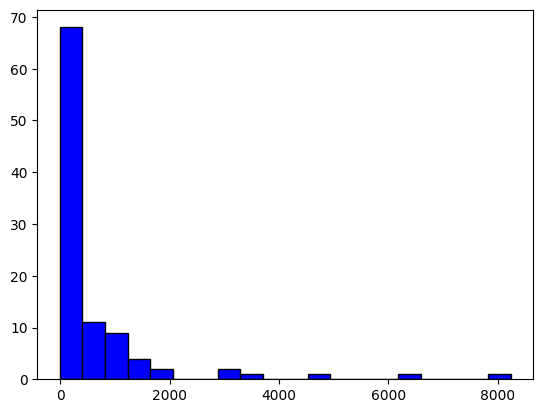

Mean balance:  634.875


In [201]:
plt.hist(end_balance, bins=20, color='blue', edgecolor='black')
plt.show()
print("Mean balance: ", sum(end_balance)/len(end_balance))